# Preparando bases

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Abrindo base Lucas com todos os PDVs
ago = pd.read_csv('/content/drive/Shareddrives/MO PROYECTOS CONSULTORIA/GUA UN 167 - 2020.12.PPF.PEP.GUA/2. Ejecucion/4. Piloto/Arquivo Vendas/Analises/bases_campo_2.csv', encoding='cp1252')

In [ ]:
ago.head()

,COD_PDV,CANAL,ALAVANCA,Status Auditoria,TTC ok (50%),Gua > Peps,Vs Concorrencia,Total PDV,Sub_seg,Avg 3 meses,Avg Alavanca,Vendas todos os meses?,Qtd PPs A/M/J,Qtd PPs J/A,Var PPs,Status Alavanca,Promotores,RNs,Portas KO?,Portas Ambev?,Clusters
0,17872,FER OFF,OFF INTERIOR,OK,OK,OK,NOK,NOK,Mercearia,1.576197,1.174495,5,3.0,3.0,0.0,OK,NaN,219,1.0,1.0,A
1,19932,FER OFF,OFF INTERIOR,OK,NaN,NaN,NaN,NaN,Padaria,4.258665,5.665640,4,4.0,5.0,1.0,NOK,NaN,222,0.0,0.0,C
2,92989,FER OFF,OFF INTERIOR,OK,OK,NOK,OK,NOK,Padaria,4.155970,3.509985,5,4.0,5.0,1.0,NOK,NaN,222,3.0,0.0,A
3,28852,FER OFF,OFF INTERIOR,OK,OK,OK,OK,OK,Padaria,3.492757,3.698685,5,4.0,5.0,1.0,NOK,NaN,219,2.0,1.0,A
4,17599,FER ON,ON EXTERIOR,OK,OK,OK,NOK,NOK,Lanchonete,0.132813,0.197000,5,1.0,3.0,2.0,OK,NaN,219,1.0,2.0,C


In [ ]:
len(ago)

693

In [ ]:
ago['COD_PDV'].duplicated().sum()

0

In [ ]:
#verificando duplicadas
ago.duplicated().sum()/len(ago)

0.0

In [ ]:
ago_ok = ago.loc[(ago['Status Alavanca']=='OK') & (ago['Vendas todos os meses?']==5)]

In [ ]:
len(ago_ok)

234

In [ ]:
#Verificando sem tinham linhas com Nan ou sem dados
ago_ok.isnull().sum()/len(ago_ok)

COD_PDV                   0.000000
CANAL                     0.000000
ALAVANCA                  0.000000
Status Auditoria          0.000000
TTC ok (50%)              0.055556
Gua > Peps                0.303419
Vs Concorrencia           0.252137
Total PDV                 0.051282
Sub_seg                   0.000000
Avg 3 meses               0.000000
Avg Alavanca              0.000000
Vendas todos os meses?    0.000000
Qtd PPs A/M/J             0.000000
Qtd PPs J/A               0.000000
Var PPs                   0.000000
Status Alavanca           0.000000
Promotores                0.931624
RNs                       0.000000
Portas KO?                0.367521
Portas Ambev?             0.000000
Clusters                  0.000000
dtype: float64

In [ ]:
ago_ok['Promotores'] = ago_ok['Promotores'].fillna(0) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ago_ok['Portas KO?'] = ago_ok['Portas KO?'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ago_ok = ago_ok.drop(['Gua > Peps', 'Vs Concorrencia'], axis=1)

In [ ]:
ago_ok_na = ago_ok.dropna()

In [ ]:
#Verificando sem tinham linhas com Nan ou sem dados
ago_ok_na.isnull().sum()/len(ago_ok_na)

COD_PDV                   0.0
CANAL                     0.0
ALAVANCA                  0.0
Status Auditoria          0.0
TTC ok (50%)              0.0
Total PDV                 0.0
Sub_seg                   0.0
Avg 3 meses               0.0
Avg Alavanca              0.0
Vendas todos os meses?    0.0
Qtd PPs A/M/J             0.0
Qtd PPs J/A               0.0
Var PPs                   0.0
Status Alavanca           0.0
Promotores                0.0
RNs                       0.0
Portas KO?                0.0
Portas Ambev?             0.0
Clusters                  0.0
dtype: float64

In [ ]:
len(ago_ok_na)

221

In [ ]:
ago_ok_na['CANAL'].unique()

array(['FER OFF', 'FER ON', 'ASR 1-4'], dtype=object)

In [ ]:
ago_ok_na['Sub_seg'].unique()

array(['Mercearia', 'Lanchonete', 'ASR', 'Restaurante', 'Padaria'],
      dtype=object)

In [ ]:
ago_ok_na['ALAVANCA'].unique()

array(['OFF INTERIOR', 'ON EXTERIOR', 'ASR Visa', 'OFF Todas',
       'ON INTERIOR', 'ON Visa', 'ASR Racks', 'OFF Visa', 'ASR Todas',
       'ASR Nenhuma', 'OFF Nenhuma', 'ON Nenhuma', 'ASR Gôndola',
       'ON TODAS', 'OFF TODAS', 'ON Todas'], dtype=object)

In [ ]:
# Separando as bases por canal
ago_asr = ago_ok_na.loc[(ago_ok_na['Sub_seg']=='ASR')]
#ago_off = ago_ok_na.loc[(ago_ok_na['CANAL']=='FER OFF')]
ago_fer = ago_ok_na.loc[(ago_ok_na['Sub_seg']!='ASR')]

In [ ]:
#Varificando alavancas no as
ago_asr['ALAVANCA'].unique()

array(['ASR Visa', 'ASR Racks', 'ASR Todas', 'ASR Nenhuma', 'ASR Gôndola'],
      dtype=object)

In [ ]:
#Varificando alavancas no off
ago_fer['ALAVANCA'].unique()

array(['OFF INTERIOR', 'ON EXTERIOR', 'OFF Todas', 'ON INTERIOR',
       'ON Visa', 'OFF Visa', 'OFF Nenhuma', 'ON Nenhuma', 'ON TODAS',
       'OFF TODAS', 'ON Todas'], dtype=object)

In [ ]:
# mudando as variavies
ago_fer['ALAVANCA'].replace({ 'OFF INTERIOR':'Interior',  'ON EXTERIOR':'Exterior','OFF Todas':'Interior', 
                             'ON INTERIOR':'Interior', 'ON Todas':'Exterior','OFF Visa':'ON Visa',
                             'ON TODAS':'Exterior','OFF TODAS':'Interior', 'OFF Nenhuma':'Nenhuma',
                             'ON Nenhuma':'Nenhuma'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#Varificando alavancas na padaria
ago_fer['ALAVANCA'].unique()

array(['Interior', 'Exterior', 'ON Visa', 'Nenhuma'], dtype=object)

# Testes de independencia por alavanca

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

FER

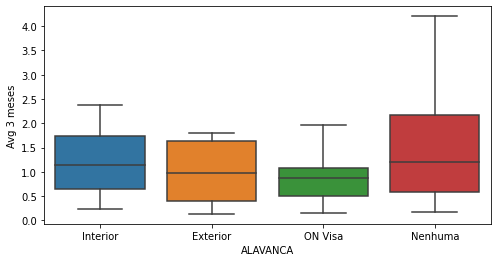

In [ ]:
# Verificando visualmente as diferencas entra as palancas
plt.figure(figsize=(8,4))
sns.boxplot(x='ALAVANCA', y='Avg 3 meses', data=ago_fer, showfliers=False)
plt.show()

In [ ]:
ago_fer['ALAVANCA'].value_counts()

Nenhuma     109
Interior     43
Exterior     16
ON Visa      12
Name: ALAVANCA, dtype: int64

In [ ]:
ago_fer_visa = ago_fer['Avg 3 meses'].loc[(ago_fer['ALAVANCA']=='ON Visa')]

In [ ]:
ago_fer_nenhuma = ago_fer['Avg 3 meses'].loc[(ago_fer['ALAVANCA']=='Nenhuma')]

In [ ]:
# H0 de que são iguais 
# H1: p < 0.10 (10% de confiança) para que sejam diferentes
t, p = stats.ttest_ind(ago_fer_visa,ago_fer_nenhuma)
if p > 0.1:
  print('Não se pode afirmar que as vendas são diferentes. Valor de p é:', p)
else:
  print('Podemos afirmar que as vendas são diferentes. Valor de p é:', p)

Não se pode afirmar que as vendas são diferentes. Valor de p é: 0.332795543683609


ASR

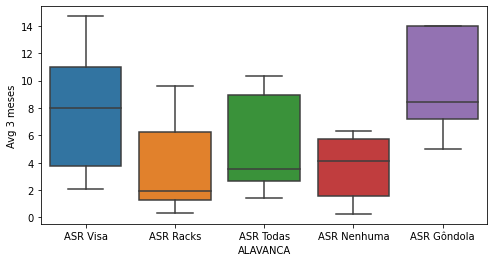

In [ ]:
# Verificando visualmente as diferencas entra as palancas
plt.figure(figsize=(8,4))
sns.boxplot(x='ALAVANCA', y='Avg 3 meses', data=ago_asr, showfliers=False)
plt.show()

In [ ]:
ago_asr['ALAVANCA'].value_counts()

ASR Nenhuma    14
ASR Visa        9
ASR Racks       7
ASR Todas       7
ASR Gôndola     4
Name: ALAVANCA, dtype: int64

In [ ]:
as_visa = ago_asr['Avg 3 meses'].loc[(ago_asr['ALAVANCA']=='ASR Visa')]

In [ ]:
as_nenhuma = ago_asr['Avg 3 meses'].loc[(ago_asr['ALAVANCA']=='ASR Nenhuma')]

In [ ]:
# H0 de que são iguais 
# H1: p < 0.10 (10% de confiança) para que sejam diferentes
t, p = stats.ttest_ind(as_visa,as_nenhuma)
if p > 0.1:
  print('Não se pode afirmar que as vendas são diferentes. Valor de p é:', p)
else:
  print('Podemos afirmar que as vendas são diferentes. Valor de p é:', p)

Não se pode afirmar que as vendas são diferentes. Valor de p é: 0.32077492980506106


In [ ]:
as_gon = ago_asr['Avg 3 meses'].loc[(ago_asr['ALAVANCA']=='ASR Gôndola')]

In [ ]:
# H0 de que são iguais 
# H1: p < 0.10 (10% de confiança) para que sejam diferentes
t, p = stats.ttest_ind(as_gon,as_nenhuma)
if p > 0.1:
  print('Não se pode afirmar que as vendas são diferentes. Valor de p é:', p)
else:
  print('Podemos afirmar que as vendas são diferentes. Valor de p é:', p)

Podemos afirmar que as vendas são diferentes. Valor de p é: 0.08885664101688136


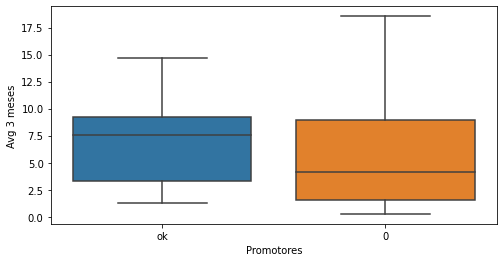

In [ ]:
# Verificando visualmente as diferencas entra as palancas
plt.figure(figsize=(8,4))
sns.boxplot(x='Promotores', y='Avg 3 meses', data=ago_asr, showfliers=False)
plt.show()

In [ ]:
as_prom = ago_asr['Avg 3 meses'].loc[(ago_asr['Promotores']=='ok')]

In [ ]:
as_s_prom = ago_asr['Avg 3 meses'].loc[(ago_asr['Promotores']==0)]

In [ ]:
# H0 de que são iguais 
# H1: p < 0.10 (10% de confiança) para que sejam diferentes
t, p = stats.ttest_ind(as_prom,as_s_prom)
if p > 0.1:
  print('Não se pode afirmar que as vendas são diferentes. Valor de p é:', p)
else:
  print('Podemos afirmar que as vendas são diferentes. Valor de p é:', p)

Não se pode afirmar que as vendas são diferentes. Valor de p é: 0.2470869408346591


Variações de vendas Base Nenhuma

In [ ]:
din_asr = pd.pivot_table(ago_asr,index=['ALAVANCA'],values=['Avg 3 meses','Avg Alavanca','RNs'], aggfunc={'Avg 3 meses':np.mean,'Avg Alavanca':np.mean,'RNs':np.count_nonzero})
#din_asr = pd.pivot_table(ago_asr,index=['ALAVANCA','Clusters'],values=['Avg 3 meses','Avg Alavanca','RNs'], aggfunc={'Avg 3 meses':np.mean,'Avg Alavanca':np.mean,'RNs':np.count_nonzero})
din_asr['Var_%']= din_asr['Avg Alavanca']/din_asr['Avg 3 meses']*100-100
din_asr['Var_abs']= din_asr['Avg Alavanca']-din_asr['Avg 3 meses']
din_asr

,Avg 3 meses,Avg Alavanca,RNs,Var_%,Var_abs
ALAVANCA,,,,,
ASR Gôndola,12.733173,10.802895,4,-15.159444,-1.930278
ASR Nenhuma,5.284771,4.222666,14,-20.097477,-1.062106
ASR Racks,4.557387,4.367967,7,-4.156319,-0.189420
ASR Todas,6.684196,6.278503,7,-6.069434,-0.405693
ASR Visa,7.653877,7.286793,9,-4.796049,-0.367084


In [ ]:
#din_fer = pd.pivot_table(ago_fer,index=['ALAVANCA'],values=['Avg 3 meses','Avg Alavanca','RNs'], aggfunc={'Avg 3 meses':np.mean,'Avg Alavanca':np.mean,'RNs':np.count_nonzero})
din_fer = pd.pivot_table(ago_fer,index=['ALAVANCA','Clusters'],values=['Avg 3 meses','Avg Alavanca','RNs'], aggfunc={'Avg 3 meses':np.mean,'Avg Alavanca':np.mean,'RNs':np.count_nonzero})
din_fer['Var_%']= din_fer['Avg Alavanca']/din_fer['Avg 3 meses']*100-100
din_fer

Avg 3 meses  Avg Alavanca  RNs      Var_%
ALAVANCA Clusters                                           
Exterior A            4.360128      3.435592    3 -21.204335
         B            1.278959      1.099737    6 -14.013134
         C            0.469986      0.735024    7  56.392747
Interior A            2.480065      2.109506    9 -14.941515
         B            1.455435      1.643082   16  12.892892
         C            0.752683      0.725932   18  -3.554088
Nenhuma  A            3.643218      3.382250   26  -7.163105
         B            1.670269      1.433536   35 -14.173363
         C            0.697162      0.745868   48   6.986283
ON Visa  A            2.489256      2.646745    4   6.326757
         B            0.747186      0.965296    4  29.190920
         C            0.510957      0.461852    4  -9.610241

# Provas de correlação linear

**ASR 1-4**

In [ ]:
ago_asr.head()

,COD_PDV,CANAL,ALAVANCA,Status Auditoria,TTC ok (50%),Total PDV,Sub_seg,Avg 3 meses,Avg Alavanca,Vendas todos os meses?,Qtd PPs A/M/J,Qtd PPs J/A,Var PPs,Status Alavanca,Promotores,RNs,Portas KO?,Portas Ambev?,Clusters
5,76664,ASR 1-4,ASR Visa,OK,OK,OK,ASR,3.738093,4.040990,5,3.0,5.0,2.0,OK,ok,413,5.0,1.0,C
25,90827,ASR 1-4,ASR Racks,OK,OK,NOK,ASR,1.287317,1.627990,5,4.0,5.0,1.0,OK,ok,413,0.0,0.0,C
50,90151,ASR 1-4,ASR Todas,OK,OK,OK,ASR,3.519453,2.391990,5,3.0,5.0,2.0,OK,ok,413,1.0,2.0,C
52,8824,ASR 1-4,ASR Visa,OK,OK,OK,ASR,2.047330,2.958655,5,6.0,4.0,-2.0,OK,0,413,4.0,1.0,C
53,31720,ASR 1-4,ASR Racks,OK,NOK,NOK,ASR,1.298623,0.471990,5,2.0,1.0,-1.0,OK,0,413,1.0,1.0,C


In [ ]:
ago_asr.to_csv(r'/content/drive/Shareddrives/MO PROYECTOS CONSULTORIA/GUA UN 167 - 2020.12.PPF.PEP.GUA/2. Ejecucion/4. Piloto/Analytics/CSVs Python/base_asr.csv', index = False)

Y como variação de vendas

In [ ]:
vendas_var = ago_asr['Avg Alavanca'] - ago_asr['Avg 3 meses']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


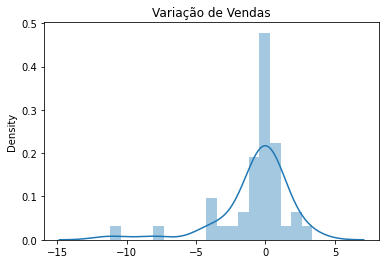

In [ ]:
sns.distplot(vendas_var)
plt.title('Variação de Vendas')
plt.show()

In [ ]:
import scipy
from scipy import stats
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt_var = PowerTransformer()
vendas_var = vendas_var.to_numpy()
vendas_var = vendas_var.reshape(-1,1)

In [ ]:
fit_transf_asr_var = pt_var.fit(vendas_var)

In [ ]:
vendas_transf_asr_var = pt_var.transform(vendas_var)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


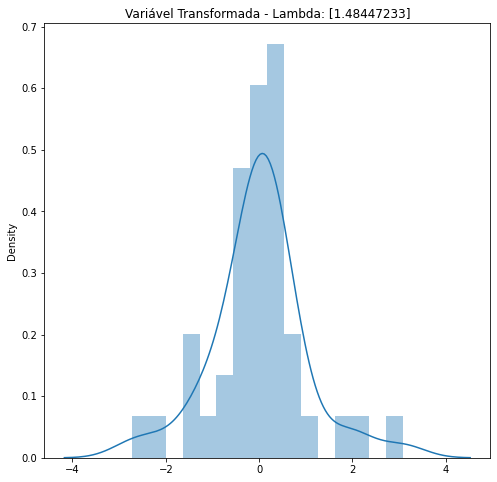

In [ ]:
plt.figure(figsize = (8, 8))
#sns.distplot(transformed_data_yeo)
sns.distplot(vendas_transf_asr_var)
plt.title(f'Variável Transformada - Lambda: {pt_var.lambdas_}')
plt.show()

In [ ]:
y_var = vendas_transf_asr_var

In [ ]:
y_var = y_var.reshape(41,)

Y como vendas após implementação

In [ ]:
vendas = ago_asr['Avg Alavanca']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


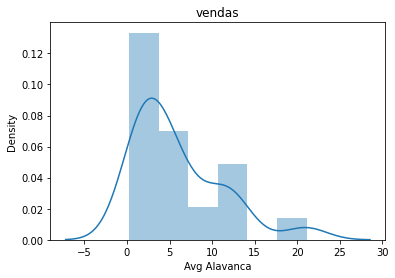

In [ ]:
sns.distplot(vendas)
plt.title('vendas')
plt.show()

In [ ]:
pt = PowerTransformer()
vendas = vendas.to_numpy()
vendas = vendas.reshape(-1,1)

In [ ]:
vendas.shape

(41, 1)

In [ ]:
fit_transf_asr = pt.fit(vendas)

In [ ]:
vendas_transf_asr = pt.transform(vendas)

In [ ]:
# Vamos fazer a transformação dessa variável em normal.
#transformed_data_yeo, lambda_found_yeo = scipy.stats.yeojohnson(vendas)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


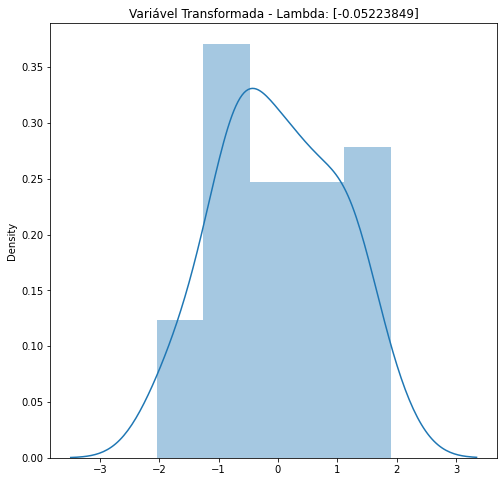

In [ ]:
plt.figure(figsize = (8, 8))
#sns.distplot(transformed_data_yeo)
sns.distplot(vendas_transf_asr)
plt.title(f'Variável Transformada - Lambda: {pt.lambdas_}')
plt.show()

In [ ]:
y = vendas_transf_asr

In [ ]:
y = y.reshape(41,)

In [ ]:
y.shape

(41,)

Preparando X - cenário para prever as vendas J/A

In [ ]:
X = ago_asr.drop(['COD_PDV', 'CANAL', 'Status Auditoria', 'Sub_seg', 'Avg Alavanca', 
                      'Vendas todos os meses?', 'Status Alavanca', 'RNs'], axis=1)

In [ ]:
X.head()

,ALAVANCA,TTC ok (50%),Total PDV,Avg 3 meses,Qtd PPs A/M/J,Qtd PPs J/A,Var PPs,Promotores,Portas KO?,Portas Ambev?,Clusters
5,ASR Visa,OK,OK,3.738093,3.0,5.0,2.0,ok,5.0,1.0,C
25,ASR Racks,OK,NOK,1.287317,4.0,5.0,1.0,ok,0.0,0.0,C
50,ASR Todas,OK,OK,3.519453,3.0,5.0,2.0,ok,1.0,2.0,C
52,ASR Visa,OK,OK,2.047330,6.0,4.0,-2.0,0,4.0,1.0,C
53,ASR Racks,NOK,NOK,1.298623,2.0,1.0,-1.0,0,1.0,1.0,C


In [ ]:
X['TTC ok (50%)'].replace({ 'OK':1,  'NOK':0}, inplace=True)

In [ ]:
X['Total PDV'].replace({ 'OK':1,  'NOK':0}, inplace=True)

In [ ]:
X['Promotores'].replace({ 'ok':1}, inplace=True)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.dtypes

TTC ok (50%)              int64
Total PDV                 int64
Avg 3 meses             float64
Qtd PPs A/M/J           float64
Qtd PPs J/A             float64
Var PPs                 float64
Promotores                int64
Portas KO?              float64
Portas Ambev?           float64
ALAVANCA_ASR Gôndola      uint8
ALAVANCA_ASR Nenhuma      uint8
ALAVANCA_ASR Racks        uint8
ALAVANCA_ASR Todas        uint8
ALAVANCA_ASR Visa         uint8
Clusters_A                uint8
Clusters_B                uint8
Clusters_C                uint8
dtype: object

In [ ]:
X.head()

,TTC ok (50%),Total PDV,Avg 3 meses,Qtd PPs A/M/J,Qtd PPs J/A,Var PPs,Promotores,Portas KO?,Portas Ambev?,ALAVANCA_ASR Gôndola,ALAVANCA_ASR Nenhuma,ALAVANCA_ASR Racks,ALAVANCA_ASR Todas,ALAVANCA_ASR Visa,Clusters_A,Clusters_B,Clusters_C
5,1,1,3.738093,3.0,5.0,2.0,1,5.0,1.0,0,0,0,0,1,0,0,1
25,1,0,1.287317,4.0,5.0,1.0,1,0.0,0.0,0,0,1,0,0,0,0,1
50,1,1,3.519453,3.0,5.0,2.0,1,1.0,2.0,0,0,0,1,0,0,0,1
52,1,1,2.047330,6.0,4.0,-2.0,0,4.0,1.0,0,0,0,0,1,0,0,1
53,0,0,1.298623,2.0,1.0,-1.0,0,1.0,1.0,0,0,1,0,0,0,0,1


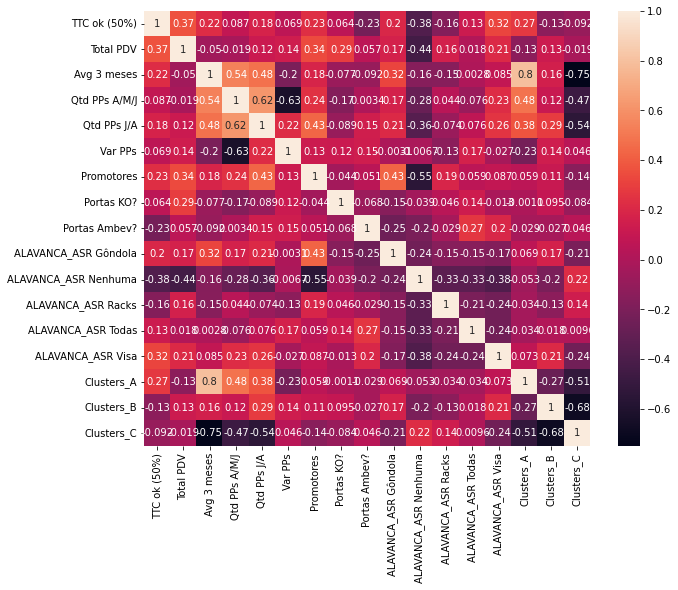

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_const = X.drop(['TTC ok (50%)', 'Total PDV','Promotores', 'Var PPs', 'Portas KO?'], axis=1)

In [ ]:
X_const = sm.add_constant(X_const)

In [ ]:
X_const.head()

,const,Avg 3 meses,Qtd PPs A/M/J,Qtd PPs J/A,Portas Ambev?,ALAVANCA_ASR Gôndola,ALAVANCA_ASR Nenhuma,ALAVANCA_ASR Racks,ALAVANCA_ASR Todas,ALAVANCA_ASR Visa,Clusters_A,Clusters_B,Clusters_C
5,1.0,3.738093,3.0,5.0,1.0,0,0,0,0,1,0,0,1
25,1.0,1.287317,4.0,5.0,0.0,0,0,1,0,0,0,0,1
50,1.0,3.519453,3.0,5.0,2.0,0,0,0,1,0,0,0,1
52,1.0,2.047330,6.0,4.0,1.0,0,0,0,0,1,0,0,1
53,1.0,1.298623,2.0,1.0,1.0,0,0,1,0,0,0,0,1


In [ ]:
X_const.shape

(41, 13)

X para prever a variação de vendas 

In [ ]:
X_var = X.drop(['Avg 3 meses'], axis=1)

In [ ]:
X_var = sm.add_constant(X_var)

In [ ]:
X_var.head()

,const,TTC ok (50%),Total PDV,Qtd PPs A/M/J,Qtd PPs J/A,Var PPs,Promotores,Portas KO?,Portas Ambev?,ALAVANCA_ASR Gôndola,ALAVANCA_ASR Nenhuma,ALAVANCA_ASR Racks,ALAVANCA_ASR Todas,ALAVANCA_ASR Visa,Clusters_A,Clusters_B,Clusters_C
5,1.0,1,1,3.0,5.0,2.0,1,5.0,1.0,0,0,0,0,1,0,0,1
25,1.0,1,0,4.0,5.0,1.0,1,0.0,0.0,0,0,1,0,0,0,0,1
50,1.0,1,1,3.0,5.0,2.0,1,1.0,2.0,0,0,0,1,0,0,0,1
52,1.0,1,1,6.0,4.0,-2.0,0,4.0,1.0,0,0,0,0,1,0,0,1
53,1.0,0,0,2.0,1.0,-1.0,0,1.0,1.0,0,0,1,0,0,0,0,1


In [ ]:
X_var.shape

(41, 17)

Modelo para prevervendas J/A

In [ ]:
multmodelin_vendas = sm.OLS(y,X_const)
multmodelin_vendas = multmodelin_vendas.fit()
print(multmodelin_vendas.summary(alpha=0.15))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     29.04
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           1.00e-12
Time:                        17:47:43   Log-Likelihood:                -9.6269
No. Observations:                  41   AIC:                             41.25
Df Residuals:                      30   BIC:                             60.10
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.075      0.925]
----------------------------------------------------------------------------------------
const                   -1.1644 

Modelo para prever variação vendas

In [ ]:
multmodelin_vendas_var = sm.OLS(y_var,X_var)
multmodelin_vendas_var = multmodelin_vendas_var.fit()
print(multmodelin_vendas_var.summary(alpha=0.15))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     1.168
Date:                Fri, 01 Oct 2021   Prob (F-statistic):              0.352
Time:                        17:39:58   Log-Likelihood:                -49.029
No. Observations:                  41   AIC:                             126.1
Df Residuals:                      27   BIC:                             150.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.075      0.925]
----------------------------------------------------------------------------------------
const                   -1.2756 

Analise de erro do modelo com previsão de vendas J/A

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
ago_asr['Avg Alavanca'].mean()

5.913056829268292

In [ ]:
# Media de vendas para cada cluster
ago_asr.groupby('Clusters').agg([np.mean,np.count_nonzero])['Avg Alavanca']

,mean,count_nonzero
Clusters,,
A,14.571439,7.0
B,7.791370,11.0
C,2.379573,23.0


In [ ]:
mean_squared_error(y, multmodelin_vendas.predict(X_const))

0.09364139865933584

In [ ]:
erro_pct = mean_squared_error(y, multmodelin_vendas.predict(X_const))/ago_asr['Avg Alavanca'].mean()
erro_pct*100

1.5836377251751095

In [ ]:
erro_test = y - multmodelin_vendas.predict(X_const)

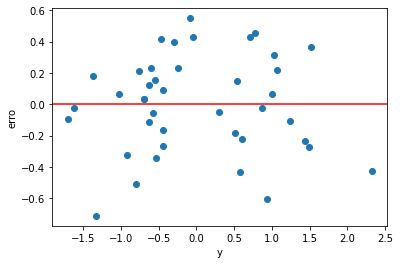

In [ ]:
plt.scatter(multmodelin_vendas.predict(X_const), erro_test)
plt.axhline(0, color='r')
plt.xlabel('y')
plt.ylabel('erro')
plt.show()

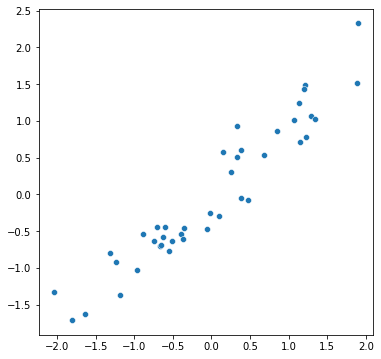

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=multmodelin_vendas.predict(X_const) )
plt.show()

In [ ]:
#construindo o X para verificas as variações de volumes com base nas variações dos dados de entrada
pred_asr = pd.read_csv('/content/drive/Shareddrives/MO PROYECTOS CONSULTORIA/GUA UN 167 - 2020.12.PPF.PEP.GUA/2. Ejecucion/4. Piloto/Arquivo Vendas/Analises/predict_sales_ago.csv', encoding='cp1252')

In [ ]:
pred_asr.head()

,const,Avg 3 meses,Qtd PPs A/M/J,Qtd PPs J/A,Portas Ambev?,ALAVANCA_ASR Gôndola,ALAVANCA_ASR Nenhuma,ALAVANCA_ASR Racks,ALAVANCA_ASR Todas,ALAVANCA_ASR Visa,Clusters_A,Clusters_B,Clusters_C
0,1,14.571439,4,4,1,0,1,0,0,0,1,0,0
1,1,7.791370,4,4,1,0,1,0,0,0,0,1,0
2,1,2.379573,4,4,1,0,1,0,0,0,0,0,1
3,1,14.571439,4,4,1,0,0,1,0,0,1,0,0
4,1,7.791370,4,4,1,0,0,1,0,0,0,1,0


In [ ]:
pred_asr.shape

(42, 13)

In [ ]:
vendas_pred_asr = multmodelin_vendas.predict(pred_asr)

In [ ]:
vendas_pred_asr.shape

(42,)

In [ ]:
vendas_pred_asr_rs = vendas_pred_asr.to_numpy()
vendas_pred_asr_rs = vendas_pred_asr_rs.reshape(-1,1)
vendas_reais = pt.inverse_transform(vendas_pred_asr_rs)

In [ ]:
vendas_reais

array([[2.0725119 ],
       [1.52549777],
       [0.67616923],
       [1.63565938],
       [1.21002734],
       [0.51750534],
       [1.76101645],
       [1.30168487],
       [0.56458383],
       [1.99277165],
       [1.46872638],
       [0.64830349],
       [2.40309161],
       [1.75717317],
       [0.78695982],
       [2.8013052 ],
       [2.02874856],
       [0.91122206],
       [3.28880629],
       [2.35081724],
       [1.05142368],
       [2.0725119 ],
       [1.52549777],
       [0.67616923],
       [1.79427469],
       [1.32584658],
       [0.57685708],
       [1.55729658],
       [1.15225138],
       [0.48739722],
       [1.35336226],
       [1.00011309],
       [0.40645069],
       [2.4494963 ],
       [1.78923274],
       [0.80193473],
       [2.91552424],
       [2.10520518],
       [0.94518239],
       [1.76211415],
       [1.30248337],
       [0.56499034]])

**FER OFF** 

In [ ]:
ago_fer.head()

,COD_PDV,CANAL,ALAVANCA,Status Auditoria,TTC ok (50%),Total PDV,Sub_seg,Avg 3 meses,Avg Alavanca,Vendas todos os meses?,Qtd PPs A/M/J,Qtd PPs J/A,Var PPs,Status Alavanca,Promotores,RNs,Portas KO?,Portas Ambev?,Clusters
0,17872,FER OFF,Interior,OK,OK,NOK,Mercearia,1.576197,1.174495,5,3.0,3.0,0.0,OK,0,219,1.0,1.0,A
4,17599,FER ON,Exterior,OK,OK,NOK,Lanchonete,0.132813,0.197000,5,1.0,3.0,2.0,OK,0,219,1.0,2.0,C
6,79572,FER OFF,Interior,OK,OK,NOK,Mercearia,1.457993,1.637990,5,3.0,4.0,1.0,OK,0,219,2.0,1.0,A
9,18214,FER OFF,Interior,OK,OK,NOK,Mercearia,0.595920,0.477000,5,2.0,2.0,0.0,OK,0,219,3.0,0.0,B
10,18354,FER ON,Interior,OK,NOK,NOK,Restaurante,0.398620,0.497215,5,2.0,4.0,2.0,OK,0,219,1.0,0.0,C


In [ ]:
ago_fer.to_csv(r'/content/drive/Shareddrives/MO PROYECTOS CONSULTORIA/GUA UN 167 - 2020.12.PPF.PEP.GUA/2. Ejecucion/4. Piloto/Analytics/CSVs Python/base_fer.csv', index = False)

In [ ]:
vendas_off = ago_fer['Avg 3 meses']

In [ ]:
vendas_fer = ago_fer['Avg 3 meses']

In [ ]:
vendas_off.shape

(180,)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


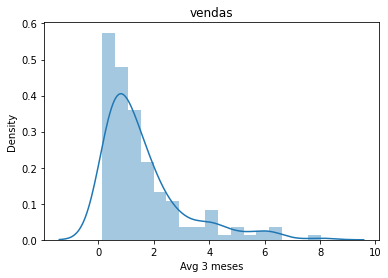

In [ ]:
sns.distplot(vendas_off)
plt.title('vendas')
plt.show()

In [ ]:
vendas_off = vendas_off.to_numpy()
vendas_off = vendas_off.reshape(-1,1)
fit_transf_off = pt.fit(vendas_off)
transformed_data_yeo_off = pt.transform(vendas_off)
transformed_data_yeo_off = transformed_data_yeo_off.reshape(180,)

In [ ]:
# Vamos fazer a transformação dessa variável em normal.
#transformed_data_yeo_off, lambda_found_yeo_off = scipy.stats.yeojohnson(vendas_off)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


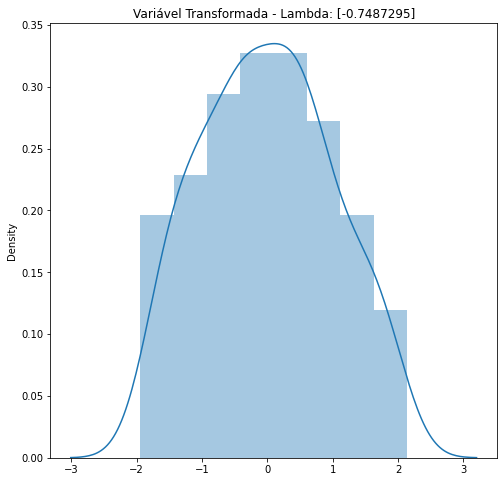

In [ ]:
plt.figure(figsize = (8, 8))
sns.distplot(transformed_data_yeo_off)
plt.title(f'Variável Transformada - Lambda: {pt.lambdas_}')
plt.show()

In [ ]:
y_off = transformed_data_yeo_off

In [ ]:
y_off.shape

(180,)

In [ ]:
X_off = ago_fer.drop(['COD_PDV', 'CANAL', 'Status Auditoria', 'Sub_seg', 'Avg Alavanca', 
                      'Vendas todos os meses?', 'Status Alavanca', 'RNs', 'Promotores'], axis=1)

In [ ]:
X_off.dtypes

ALAVANCA          object
TTC ok (50%)      object
Total PDV         object
Avg 3 meses      float64
Qtd PPs A/M/J    float64
Qtd PPs J/A      float64
Var PPs          float64
Portas KO?       float64
Portas Ambev?    float64
Clusters          object
dtype: object

In [ ]:
X_off['TTC ok (50%)'].replace({ 'OK':1,  'NOK':0}, inplace=True)

In [ ]:
X_off['Total PDV'].replace({ 'OK':1,  'NOK':0}, inplace=True)

In [ ]:
X_off = pd.get_dummies(X_off)

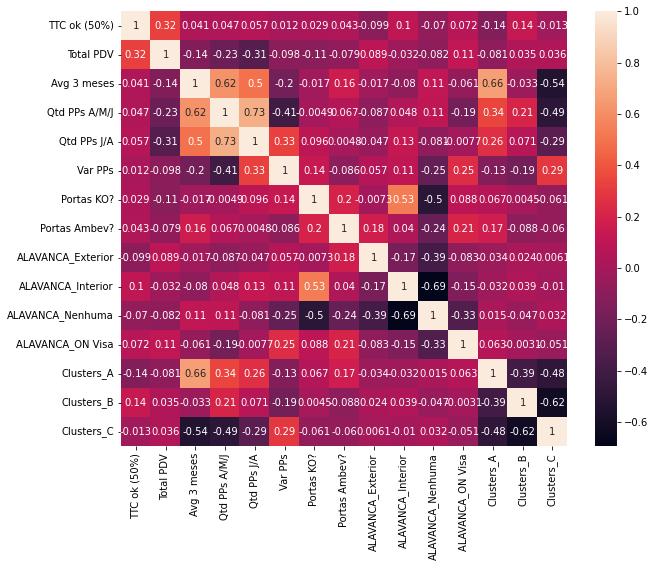

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(X_off.corr(), annot=True)
plt.show()

In [ ]:
X_off = X_off.drop(['TTC ok (50%)', 'Portas KO?', 'Var PPs'], axis=1)

In [ ]:
X_na_object_dmm_off = sm.add_constant(X_off)
multmodelin_vendas_off = sm.OLS(y_off,X_na_object_dmm_off)
multmodelin_vendas_off = multmodelin_vendas_off.fit()
print(multmodelin_vendas_off.summary(alpha=0.15))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     138.5
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           5.60e-76
Time:                        17:41:17   Log-Likelihood:                -55.700
No. Observations:                 180   AIC:                             133.4
Df Residuals:                     169   BIC:                             168.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.075      0.925]
-------------------------------------------------------------------------------------
const                -0.8603      0.06

In [ ]:
#df_coef_off = pd.read_html(multmodelin_vendas_off.summary().tables[1].as_html(),header=0,index_col=0)[0]
#df_coef_off

In [ ]:
# Media de vendas para cada cluster
ago_fer.groupby('Clusters').agg([np.mean, np.count_nonzero])['Avg Alavanca']

,mean,count_nonzero
Clusters,,
A,3.043281,42.0
B,1.424962,61.0
C,0.725467,77.0


In [ ]:
mean_squared_error(y_off, multmodelin_vendas_off.predict(X_na_object_dmm_off))

0.10871892563098773

In [ ]:
erro_pct_off = mean_squared_error(y_off, multmodelin_vendas_off.predict(X_na_object_dmm_off))/ago_fer['Avg Alavanca'].mean()
erro_pct_off*100

7.231818027594597

In [ ]:
erro_test_off = y_off - multmodelin_vendas_off.predict(X_na_object_dmm_off)

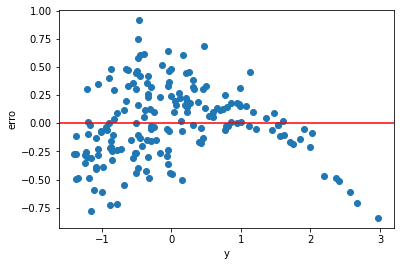

In [ ]:
plt.scatter(multmodelin_vendas_off.predict(X_na_object_dmm_off), erro_test_off)
plt.axhline(0, color='r')
plt.xlabel('y')
plt.ylabel('erro')
plt.show()

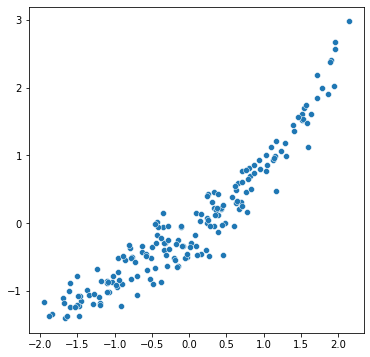

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_off, y=multmodelin_vendas_off.predict(X_na_object_dmm_off) )
plt.show()

In [ ]:
pred_fer = pd.read_csv('/content/drive/Shareddrives/MO PROYECTOS CONSULTORIA/GUA UN 167 - 2020.12.PPF.PEP.GUA/2. Ejecucion/4. Piloto/Arquivo Vendas/Analises/predict_sales_ago_fer.csv', encoding='cp1252')

In [ ]:
pred_fer.head()

,const,Total PDV,Avg 3 meses,Qtd PPs A/M/J,Qtd PPs J/A,Portas Ambev?,ALAVANCA_Exterior,ALAVANCA_Interior,ALAVANCA_Nenhuma,ALAVANCA_ON Visa,Clusters_A,Clusters_B,Clusters_C
0,1,1,3.043281,3,3,1,0,0,1,0,1,0,0
1,1,1,1.424962,3,3,1,0,0,1,0,0,1,0
2,1,1,0.725467,3,3,1,0,0,1,0,0,0,1
3,1,1,3.043281,3,3,1,0,0,0,1,1,0,0
4,1,1,1.424962,3,3,1,0,0,0,1,0,1,0


In [ ]:
vendas_pred_off = multmodelin_vendas_off.predict(pred_fer)

In [ ]:
vendas_pred_off_rs = vendas_pred_off.to_numpy()
vendas_pred_off_rs = vendas_pred_off_rs.reshape(-1,1)
vendas_reais_off = pt.inverse_transform(vendas_pred_off_rs)

In [ ]:
vendas_reais_off

array([[2.48466264],
       [1.43237848],
       [0.82117333],
       [2.17497281],
       [1.26411435],
       [0.71851671],
       [2.39327724],
       [1.38337698],
       [0.79153018],
       [2.20394112],
       [1.28012331],
       [0.72839001],
       [2.19632226],
       [1.27591837],
       [0.72579887],
       [2.64326024],
       [1.51617426],
       [0.8713969 ],
       [2.81492549],
       [1.60515177],
       [0.92409357],
       [3.00125228],
       [1.6997811 ],
       [0.979441  ],
       [2.33775691],
       [1.35334398],
       [0.77326038],
       [2.20134979],
       [1.27869356],
       [0.72750915],
       [2.62300429],
       [1.50555836],
       [0.86506647],
       [2.77124426],
       [1.58267702],
       [0.91084356],
       [2.35530165],
       [1.36285625],
       [0.77905533]])

# Arvore de Decisao

Usando para previsão do volume de vendas J/A

In [ ]:
X.head()

,TTC ok (50%),Total PDV,Avg 3 meses,Qtd PPs A/M/J,Qtd PPs J/A,Var PPs,Promotores,Portas KO?,Portas Ambev?,ALAVANCA_ASR Gôndola,ALAVANCA_ASR Nenhuma,ALAVANCA_ASR Racks,ALAVANCA_ASR Todas,ALAVANCA_ASR Visa,Clusters_A,Clusters_B,Clusters_C
5,1,1,3.738093,3.0,5.0,2.0,1,5.0,1.0,0,0,0,0,1,0,0,1
25,1,0,1.287317,4.0,5.0,1.0,1,0.0,0.0,0,0,1,0,0,0,0,1
50,1,1,3.519453,3.0,5.0,2.0,1,1.0,2.0,0,0,0,1,0,0,0,1
52,1,1,2.047330,6.0,4.0,-2.0,0,4.0,1.0,0,0,0,0,1,0,0,1
53,0,0,1.298623,2.0,1.0,-1.0,0,1.0,1.0,0,0,1,0,0,0,0,1


In [ ]:
X_arv_asr = X

In [ ]:
y_arv_asr = ago_asr['Avg Alavanca']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_arv_asr, y_arv_asr, test_size=0.15, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_random = RandomForestRegressor(random_state=42)
model_tree = DecisionTreeRegressor(random_state=42)

In [ ]:
parameters_random = {'max_depth':[18, 10, 25], 'min_samples_split':[10, 20], 'min_samples_leaf':[6, 8, 10],
                     'n_estimators':[50,100,150]}

In [ ]:
parameters_tree = {'max_depth':[18, 10, 25], 'min_samples_split':[ 10, 20], 'min_samples_leaf':[6, 8, 10]}


Fazendo modelo com random

In [ ]:
grid_random = GridSearchCV(model_random, parameters_random, cv=5, scoring='r2')

In [ ]:
grid_tree = GridSearchCV(model_tree, parameters_tree, cv=5, scoring='r2')

In [ ]:
fit_random = grid_random.fit(X_train,y_train)

In [ ]:
fit_random.best_params_

{'max_depth': 18,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 150}

In [ ]:
pred_random_train = fit_random.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
print("r2 com dados de treino para random: ",r2_score(y_train, pred_random_train))

r2 com dados de treino para random:  0.7541891217039036


In [ ]:
pred_random_test = fit_random.predict(X_test)

In [ ]:
print("r2 com dados de teste para random: ",r2_score(y_test, pred_random_test))

r2 com dados de teste para random:  0.6011495437401846


Fazendo com Arvore de decisão

In [ ]:
fit_tree = grid_tree.fit(X_train,y_train)

In [ ]:
fit_tree.best_params_

{'max_depth': 18, 'min_samples_leaf': 6, 'min_samples_split': 10}

In [ ]:
pred_tree_train = fit_tree.predict(X_train)

In [ ]:
print("r2 com dados de treino para arvore: ",r2_score(y_train, pred_tree_train))

r2 com dados de treino para arvore:  0.8322109154692418


In [ ]:
pred_tree_test = fit_tree.predict(X_test)

In [ ]:
print("r2 com dados de teste para arvore: ",r2_score(y_test, pred_tree_test))

r2 com dados de teste para arvore:  0.844789210911611


Analisando Featura Importance

In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 5.1 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491640 sha256=4d34862db69cf5437a364487ef197ab5212de18a33b087e35adf68c90b3e6978
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap

In [ ]:
asr_tree = fit_tree.best_estimator_

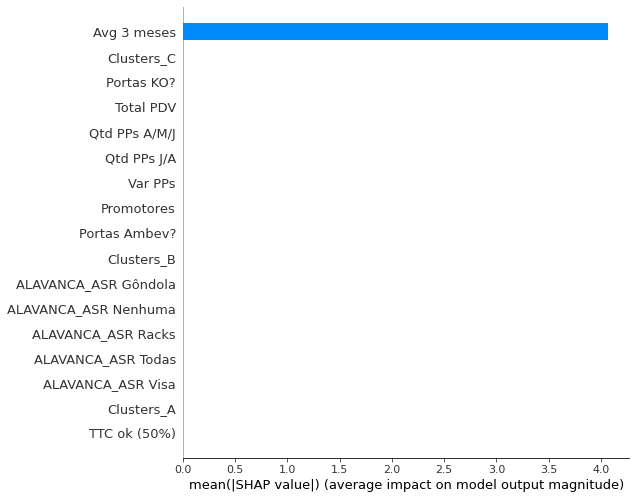

In [ ]:
explainer =  shap.TreeExplainer(asr_tree)
shap_values = explainer.shap_values(X_arv_asr.values)
shap.summary_plot(shap_values, X_arv_asr, plot_type='bar')

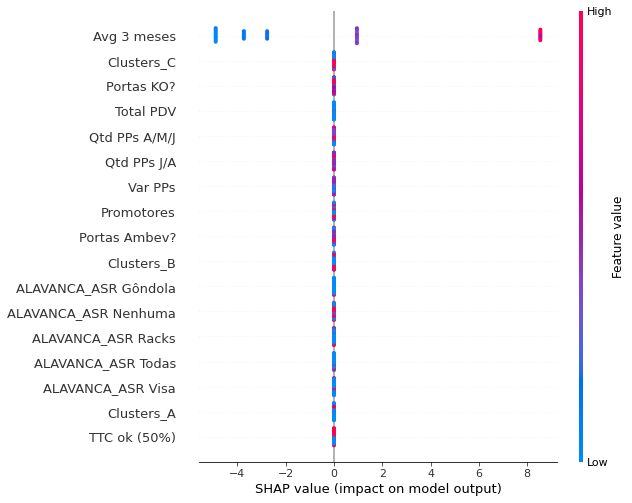

In [ ]:
explainer =  shap.TreeExplainer(asr_tree)
shap_values = explainer.shap_values(X_arv_asr.values)
shap.summary_plot(shap_values, X_arv_asr)

Fazendo para a previsão da variação de vendas

In [ ]:
X_var.head()

,const,TTC ok (50%),Total PDV,Qtd PPs A/M/J,Qtd PPs J/A,Var PPs,Promotores,Portas KO?,Portas Ambev?,ALAVANCA_ASR Gôndola,ALAVANCA_ASR Nenhuma,ALAVANCA_ASR Racks,ALAVANCA_ASR Todas,ALAVANCA_ASR Visa,Clusters_A,Clusters_B,Clusters_C
5,1.0,1,1,3.0,5.0,2.0,1,5.0,1.0,0,0,0,0,1,0,0,1
25,1.0,1,0,4.0,5.0,1.0,1,0.0,0.0,0,0,1,0,0,0,0,1
50,1.0,1,1,3.0,5.0,2.0,1,1.0,2.0,0,0,0,1,0,0,0,1
52,1.0,1,1,6.0,4.0,-2.0,0,4.0,1.0,0,0,0,0,1,0,0,1
53,1.0,0,0,2.0,1.0,-1.0,0,1.0,1.0,0,0,1,0,0,0,0,1


In [ ]:
X_var_dt = X_var.drop(['const'], axis=1)

In [ ]:
y_var_dt = ago_asr['Avg Alavanca'] - ago_asr['Avg 3 meses']

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_var_dt, y_var_dt, test_size=0.15, random_state=42)

In [ ]:
model_random2 = RandomForestRegressor(random_state=42)
model_tree2 = DecisionTreeRegressor(random_state=42)

In [ ]:
parameters_random2 = {'max_depth':[18, 10, 25], 'min_samples_split':[10, 20], 'min_samples_leaf':[6, 8, 10],
                     'n_estimators':[50,100,150]}

In [ ]:
parameters_tree = {'max_depth':[18, 10, 25], 'min_samples_split':[ 10, 20], 'min_samples_leaf':[6, 8, 10]}

In [ ]:
fit_tree2 = grid_tree.fit(X_train2,y_train2)

In [ ]:
fit_tree2.best_params_

{'max_depth': 18, 'min_samples_leaf': 6, 'min_samples_split': 20}

In [ ]:
pred_tree_train2 = fit_tree2.predict(X_train2)

In [ ]:
print("r2 com dados de treino para arvore: ",r2_score(y_train2, pred_tree_train2))

r2 com dados de treino para arvore:  0.2112298559342849


# Graficos 3 D

In [ ]:
import plotly.express as px

ASR

In [ ]:
# Abrindo base para graficos 3d com base nos coeficientes
cubo_p = pd.read_csv('/content/drive/Shareddrives/MO PROYECTOS CONSULTORIA/GUA UN 167 - 2020.12.PPF.PEP.GUA/2. Ejecucion/4. Piloto/Arquivo Vendas/Analises/3D.csv', encoding='cp1252')

In [ ]:
cubo_p.head()

,Alavancas,TTC,PPs,Vol Uplift
0,Gôndola,OK,-3 a -1 PPs,0.317016
1,Visa,OK,-3 a -1 PPs,0.987599
2,Racks,OK,-3 a -1 PPs,1.028994
3,Todas,OK,-3 a -1 PPs,1.126964
4,Gôndola,NOK,-3 a -1 PPs,0.276231


In [ ]:
#df = px.data.cubo
fig_p = px.scatter_3d(cubo_p, x='Alavancas', y='TTC', z='PPs', size='Vol Uplift', color='Vol Uplift', size_max=70)
fig_p.show()

FER

In [ ]:
# Abrindo base para graficos 3d com base nos coeficientes
cubo_off = pd.read_csv('/content/drive/Shareddrives/MO PROYECTOS CONSULTORIA/GUA UN 167 - 2020.12.PPF.PEP.GUA/2. Ejecucion/4. Piloto/Arquivo Vendas/Analises/3D_perc_off.csv', encoding='cp1252')

In [ ]:
#df = px.data.cubo
fig_off = px.scatter_3d(cubo_off, x='Alavancas', y='TTC', z='PPs', size='Vol Uplift', color='Vol Uplift', size_max=70)
fig_off.show()

# Sazonalidade

In [ ]:
ts = pd.read_csv('/content/drive/Shareddrives/MO PROYECTOS CONSULTORIA/GUA UN 167 - 2020.12.PPF.PEP.GUA/2. Ejecucion/4. Piloto/Arquivo Vendas/Analises/Sales_hist.csv', encoding='cp1252')

In [ ]:
ts.head()

,Data,Sales_hist
0,2019-1,1.398396
1,2019-2,1.338236
2,2019-3,1.609377
3,2019-4,1.711382
4,2019-5,1.799747


In [ ]:
ts['dt'] = pd.to_datetime(ts['Data'])
ts = ts.set_index('dt')

ts.drop('Data', axis=1, inplace=True)

ts.columns = ['close']

In [ ]:
ts.sort_index(inplace=True)

In [ ]:
ts.head()

,close
dt,
2019-01-01,1.398396
2019-02-01,1.338236
2019-03-01,1.609377
2019-04-01,1.711382
2019-05-01,1.799747


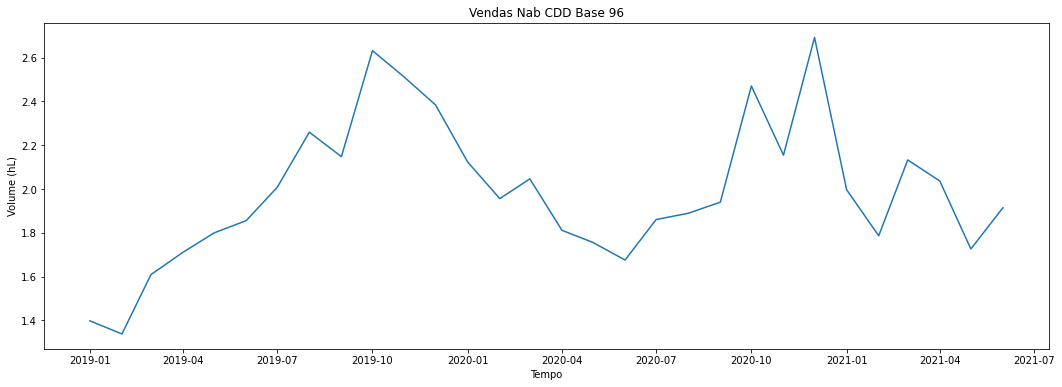

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(ts)

plt.title('Vendas Nab CDD Base 96')
plt.ylabel('Volume (hL)')
plt.xlabel('Tempo');

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

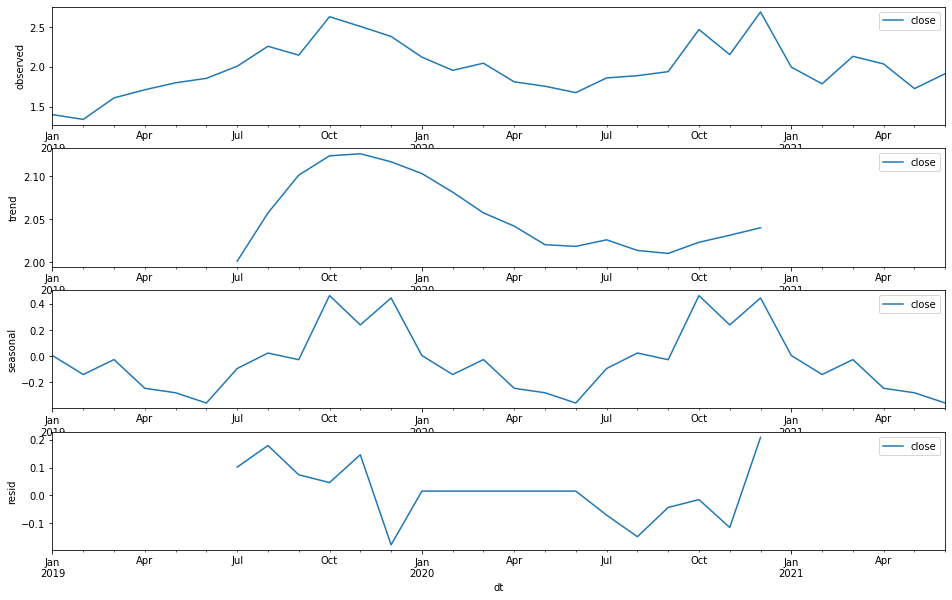

In [ ]:
decomposition = seasonal_decompose(ts, freq=12)

fig, ax = plt.subplots(4, 1, figsize=(16, 10))
decomposition.observed.plot(ax=ax[0]); ax[0].set_ylabel('observed')
decomposition.trend.plot(ax=ax[1]); ax[1].set_ylabel('trend')
decomposition.seasonal.plot(ax=ax[2]); ax[2].set_ylabel('seasonal')
decomposition.resid.plot(ax=ax[3]); ax[3].set_ylabel('resid');

In [ ]:
decomposition.seasonal.tail()


,close
dt,
2021-02-01,-0.140491
2021-03-01,-0.026369
2021-04-01,-0.245743
2021-05-01,-0.279906
2021-06-01,-0.358200
